In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
h = 6.626*10**(-34)
k_b = 1.381*10**(-23)
c = 3.00*10**8


Exercise 1:

In [63]:
# 30 GHz soltuiosn:
T = 293
N_1 = 10**10
v = 30*10**9
N_2 = np.exp(-h*v/(k_b*T))*N_1
print(f"Pop: {N_2:.2} % ({N_2/N_1*100:.3})")

Pop: 1e+10 % (99.5)


In [64]:
T = 293
N_1 = 10**10
vbar = 100000
N_2 = np.exp(-h*c*vbar/(k_b*T))*N_1
print(f"Pop: {N_2:.2} % ({N_2/N_1*100:.3})")

Pop: 7.4e+07 % (0.735)


In [65]:
T = 293
N_1 = 10**10
v = c / (300*10**(-9)) # v = c/lambda
N_2 = np.exp(-h*v/(k_b*T))*N_1
print(f"Pop: {N_2:.2} % ({N_2/N_1*100:.3})")

Pop: 7.6e-62 % (7.64e-70)


Exercise 2a:

In [66]:
# Rotational constants in cm^-1
hbar = h / (2*np.pi)
U = 1.667*10**(-27)

def red_mass(m1,m2):
    return m1*m2/(m1+m2)

def B_tilde(m1, m2, R):
    I = red_mass(m1,m2)*R**2
    B_m = hbar/(4*np.pi*c*I)
    return B_m / 100 #Need it in cm⁻1
## Hydrogen
L1 = 74.1*10**(-12) #H2 bond length
m1, m2 = 1*U, 1*U

BOOM = B_tilde(m1,m2,L1)
print(f"B~ is equal to: {BOOM:.2} cm^-1")

B~ is equal to: 6.1e+01 cm^-1


In [67]:
names = ["H2", "O2", "HF", "HCl", "N2", "NO"]
lens = [74.1, 120.8, 91.7, 127.5, 109.0, 116.9]
ms = [[1,1], [16,16], [1, 7], [1,35], [14,14], [14, 16]]
for name, len, m in zip(names, lens, ms):
    m1, m2 = m
    m1, m2 = m1*U, m2*U
    L1 = len*10**(-12)
    BOOM = B_tilde(m1,m2,L1)
    print(f"{name} - B~ is equal to: {BOOM:.3} cm^-1")

H2 - B~ is equal to: 61.1 cm^-1
O2 - B~ is equal to: 1.44 cm^-1
HF - B~ is equal to: 22.8 cm^-1
HCl - B~ is equal to: 10.6 cm^-1
N2 - B~ is equal to: 2.02 cm^-1
NO - B~ is equal to: 1.64 cm^-1


Exercise 2B:

In [68]:
# Population of J=1,2,3,4,5 for HCl at room temp.

# Q_rot = sum_i(g_i*exp(-E_i/kT))
# SO basically I want to calculate across all levels i until the sum converges reasonably.
def degen(J):
    return 2*J+1
def energy(J, B):
    return B*J*(J+1)

def get_Q_rot(T, B, rng):
    foo = 0
    for i in range(rng):
        foo += degen(i)*np.exp(-energy(i, B)/(k_b*T))
    return foo
# Using HCl 10.6 cm⁻1
B_tilde = 10.6
tot = get_Q_rot(293.15, B=(B_tilde*100*(h*c)), rng = 100)
print(tot)
for i in range(1,6):
    e = degen(i)*np.exp(-energy(i, B=(B_tilde*100*(h*c)))/(k_b*T))
    print(f"At J = {i}, the population is: {e/tot} at T = {T}")

19.550273429082413
At J = 1, the population is: 0.1382731641716567 at T = 293
At J = 2, the population is: 0.1871223293925311 at T = 293
At J = 3, the population is: 0.19167351068049526 at T = 293
At J = 4, the population is: 0.16247423308342596 at T = 293
At J = 5, the population is: 0.11797285302356013 at T = 293


Exercise 3

In [69]:
B = 8*100 # m⁻1
mu = red_mass(80,1)*U

R = np.sqrt(hbar/(4*np.pi*c*mu*B))
print(f"approximate HBr bond length {R*10**10:.2f} Å")

approximate HBr bond length 1.46 Å


Exercise 4

In [70]:
# Plot the fundamental vib transitions, including rotational fine structre J=20
# for HCl 2865 cm⁻1 - normalized I vs vtilde.
# 2865 cm⁻1 -> Fundamental vibrational transition. H 

In [71]:
B_tilde = 10.8        # cm^-1

c = 3.00*10**8*10**2    # cm⁻1
base = 2865          # vibrational band origin (cm^-1)

def E_J(J):
    return h * c * B_tilde * J * (J + 1)

def boltzmann(J):
    # N = (2*J+1)*np.exp(-E(J)/k_B*T)
    return (2*J + 1) * np.exp(-E_J(J)/(k_b*T))

Jmax = 50
Q_rot = sum(boltzmann(J) for J in range(Jmax))

wavenumbers = []
intensities = []

for J in range(Jmax):
    
    nu_R = base + 2*B_tilde*(J+1)   # R branch
    I_r = boltzmann(J)/Q_rot

    wavenumbers.append(nu_R)
    intensities.append(I_r)

    nu_P = base - 2*B_tilde*J
    I_p = boltzmann(J)/Q_rot

    wavenumbers.append(nu_P)
    intensities.append(I_p)


In [72]:
def gaussian(x, x0, sigma):
    return np.exp(-(x - x0)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2*np.pi))

nu = np.linspace(2500, 3300, 20000)

spectrums = []
sigmas = [1,5,10,100]
for sigma in sigmas:
    spectrum = np.zeros_like(nu)
    spectrums.append(spectrum)
    for wn, I in zip(wavenumbers, intensities):
        spectrum += I * gaussian(nu, wn, sigma)


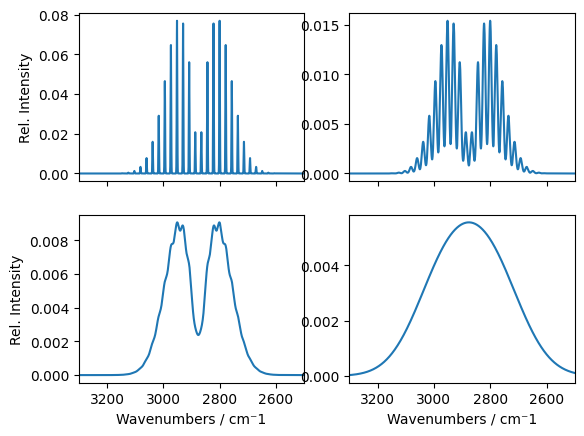

In [73]:
fig, axs = plt.subplots(2,2, sharex=True)
axs[0,0].plot(nu, spectrums[0])
axs[0,1].plot(nu, spectrums[1])
axs[1,0].plot(nu, spectrums[2])
axs[1,1].plot(nu, spectrums[3])

axs[1,0].set_xlabel("Wavenumbers / cm⁻1")
axs[1,1].set_xlabel("Wavenumbers / cm⁻1")
axs[0,0].set_ylabel("Rel. Intensity")
axs[1,0].set_ylabel("Rel. Intensity")
plt.xlim(3300, 2500)  
plt.show()
#When the width of the individual rot-vib transitions increase, the resolution dissappears.

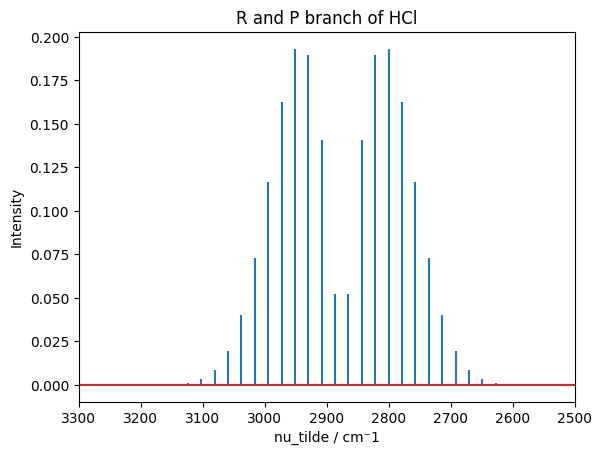

In [74]:
plt.figure()
plt.stem(np.array(wavenumbers), np.array(intensities), markerfmt='')
plt.title("R and P branch of HCl")
plt.xlim(2500,3300)
plt.xlabel("nu_tilde / cm⁻1")
plt.ylabel("Intensity")
plt.gca().invert_xaxis()
plt.show()

Exercise 6.

The difference is that our plot doesnt take into account the isotope abundances of Cl.
They are apparently 1-3 in ratio between 35Cl and 37Cl. Furthermore, we don't take into account the effect on B_tilde changes with R and P branch using these isotopes. Beside that, we dont account for changes in the B_tilde with the increase in J.

# Computer exercises

Exercise 1.

In [75]:
# Optimized with R2Scan-3C with Orca:
r_HCl=1.279

Exercise 2.

In [76]:
# Optimized with B3lyp hybrid meta-gga
r_OH=0.967

In [77]:
# Optimized with B3lyp hybrid meta-gga
r_MeO = 1.407

Exercise 3.

In [78]:
# MeOH dimer B3lyp
r_H_OH = 1.848

In [79]:
# H2O dimer B3lyp
r_OH_H = 1.911

Exercise 5.

In [80]:
# MeOH dimer:
G = -231.07164521*627.509
G

-144999.5370140819

In [81]:
# H2O dimer:
G = -152.63541363*627.509
G

-95780.09577154767

Exercise 6:

In [82]:
# Gauche and trans IPA:
G_Gauche = -194.01022842*607.509
G_Trans = -194.01021974*607.509
G_over_T = G_Gauche-G_Trans
print(f"Gauche: {G_Gauche}, Trans: {G_Trans} \n G-T: {G_Gauche-G_Trans} kcal/mol")


Gauche: -117862.95985720579, Trans: -117862.95458402766 
 G-T: -0.005273178132483736 kcal/mol


In [83]:
# Calculate population abundance at T=298K
E_G = G_Gauche/4184 # kcal/mol to J/mol
E_T = G_Trans/4184
Q = np.exp(E_G/(8.314*298)) + np.exp(E_T/(8.314*298))

# Now population:
P_G = np.exp(E_G/(298*8.314))/Q
P_T = np.exp(E_T/(298*8.314))/Q

print(f"Population of G: {P_G}")
print(f"Population of T: {P_T}")
print(f"Roughly 50-50")

Population of G: 0.49999999987282717
Population of T: 0.5000000001271728
Roughly 50-50


In [136]:
from pathlib import Path
import re
import pandas as pd

path_G = Path(Path.cwd() / "./IPA/IPA_G.inp.out")
path_T = Path(Path.cwd() / "./IPA/IPA_T.inp.out")
def extract(path_G):
    data = []
    capture = False
    with open(path_G, "r") as f:
        txt = f.read()
        start = txt.find("IR SPECTRUM")
        txt = txt[start-20:].splitlines()
        for line in txt:
            if "IR SPECTRUM" in line:
                print(line)
                capture = True  
                continue

            if capture:
                match = re.match(
                    r"\s*(\d+):\s+"
                    r"([\d\.]+)\s+"
                    r"([\d\.]+)\s+"
                    r"([\d\.]+)\s+"
                    r"([\d\.]+)\s+"
                    r"\(\s*([-\d\.]+)\s+([-\d\.]+)\s+([-\d\.]+)\s*\)",
                    line
                )
                if match:
                    data.append({
                        "Mode": int(match.group(1)),
                        "Frequency_cm-1": float(match.group(2)),
                        "Epsilon_L_mol_cm": float(match.group(3)),
                        "Intensity_km_mol": float(match.group(4)),
                        "T2_au": float(match.group(5)),
                        "TX": float(match.group(6)),
                        "TY": float(match.group(7)),
                        "TZ": float(match.group(8)),
                    })
    df = pd.DataFrame(data)
    return df

In [134]:
def normalize(col):
    su = col.sum()
    bar = np.array(col.to_list())
    return np.abs(bar)/su

In [137]:
df_G = extract(path_G)
df_T = extract(path_T)

IR SPECTRUM
IR SPECTRUM


Text(0, 0.5, 'normalized intensity')

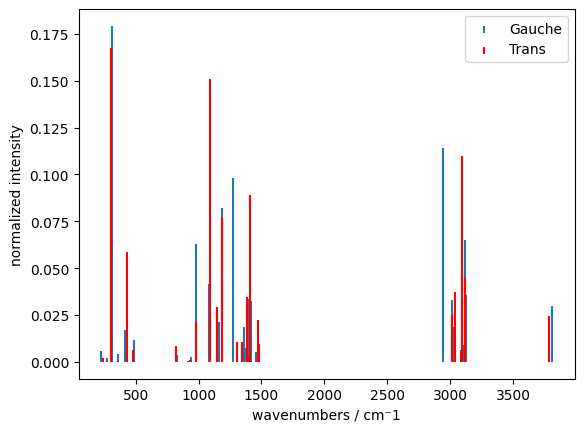

In [150]:
plt.figure()
plt.stem(df_G['Frequency_cm-1'], normalize(df_G['Intensity_km_mol']), markerfmt=" ", basefmt=" ", label="Gauche")
plt.stem(df_T['Frequency_cm-1'], normalize(df_T['Intensity_km_mol']), markerfmt=" ", basefmt=" ",linefmt="r", label="Trans")
plt.legend()
plt.xlabel("wavenumbers / cm⁻1")
plt.ylabel("normalized intensity")

Exercise 7: